In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
class XORNN:
    def __init__(self, inputLayer, hiddenNeurons, outputLayer):
        self.inputLayer = inputLayer
        self.hiddenNeurons = hiddenNeurons
        self.outputLayer = outputLayer
        self.parameters = self.init_parameters()

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def init_parameters(self):
        W1 = np.random.randn(self.hiddenNeurons, self.inputLayer)
        W2 = np.random.randn(self.outputLayer, self.hiddenNeurons)
        b1 = np.zeros((self.hiddenNeurons, 1))
        b2 = np.zeros((self.outputLayer, 1))
        return [W1, b1, W2, b2]

    def forward_propogation(self, X, Y):
        m = X.shape[1]
        parameters = self.parameters
        W1, b1, W2, b2 = parameters[0], parameters[1], parameters[2], parameters[3]

        Z1 = np.dot(W1, X) + b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = self.sigmoid(Z2)

        logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
        cost = -np.sum(logprobs) / m

        cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
        return cost, cache, A2

    def backward_propogation(self, X, Y, cache):
        m = X.shape[1]
        (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

        dZ2 = A2 - Y
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = np.multiply(dA1, A1 * (1 - A1))
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        gradients = {
            "dZ2": dZ2,
            "dW2": dW2,
            "db2": db2,
            "dZ1": dZ1,
            "dW1": dW1,
            "db1": db1,
        }
        return gradients

    def updateParameters(self, gradients, lr):
        parameters = self.parameters
        parameters[0] = parameters[0] - lr * gradients["dW1"]
        parameters[2] = parameters[2] - lr * gradients["dW2"]
        parameters[1] = parameters[1] - lr * gradients["db1"]
        parameters[3] = parameters[3] - lr * gradients["db2"]

    def train(self, X, Y, epochs, lr):
        print("Training Model...")
        losses = np.zeros((epochs, 1))
        accuracies = np.zeros((epochs, 1))

        for i in range(epochs):
            losses[i, 0], cache, A2 = self.forward_propogation(X, Y)
            gradients = self.backward_propogation(X, Y, cache)
            self.updateParameters(gradients, lr)

            # Calculate accuracy
            Y_pred = self.predict(X)
            acc = self.accuracy(Y, Y_pred)
            accuracies[i, 0] = acc

            # Print the loss and accuracy every 1000 epochs
            if i % 10000 == 0:
                print(f"Epoch {i}, Loss: {losses[i, 0]}, Accuracy: {acc}")

        return losses, accuracies

    def predict(self, X):
        _, _, A2 = self.forward_propogation(X, np.zeros(X.shape))
        prediction = (A2 > 0.5) * 1.0
        return prediction

    def accuracy(self, Y_true, Y_pred):
        m = Y_true.shape[1]
        return 1 - np.sum(np.abs(Y_pred - Y_true)) / m


# Plot the loss graph
def plot_loss(losses):
    plt.figure(figsize=(8, 6))
    plt.plot(losses, label="Training Loss")
    plt.title("Training Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


# Plot the accuracy graph
def plot_accuracy(accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(accuracies, label="Training Accuracy")
    plt.title("Training Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [70]:
# XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # XOR input
Y = np.array([[0, 1, 1, 0]])  # XOR output


In [71]:
# Create the XORNN 
xornn = XORNN(inputLayer=X.shape[0], hiddenNeurons=2, outputLayer=1)

# Train
epochs = 100000
lr = 0.01
losses, accuracies = xornn.train(X, Y, epochs, lr)
print("Training Completed !")



Training Model...
Epoch 0, Loss: 0.6951005361526587, Accuracy: 0.75
Epoch 10000, Loss: 0.6880136890727035, Accuracy: 0.5
Epoch 20000, Loss: 0.6546970145907982, Accuracy: 0.5
Epoch 30000, Loss: 0.555092306010166, Accuracy: 0.75
Epoch 40000, Loss: 0.29559097962656045, Accuracy: 1.0
Epoch 50000, Loss: 0.08975193538759861, Accuracy: 1.0
Epoch 60000, Loss: 0.047691949111367704, Accuracy: 1.0
Epoch 70000, Loss: 0.031859419426584754, Accuracy: 1.0
Epoch 80000, Loss: 0.023745464093313667, Accuracy: 1.0
Epoch 90000, Loss: 0.018857352986887087, Accuracy: 1.0
Training Completed !


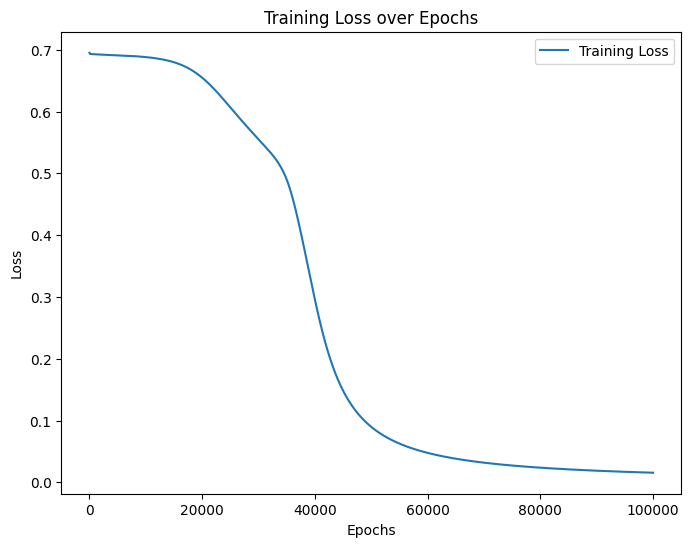

In [72]:
# Plot the loss graph
plot_loss(losses)



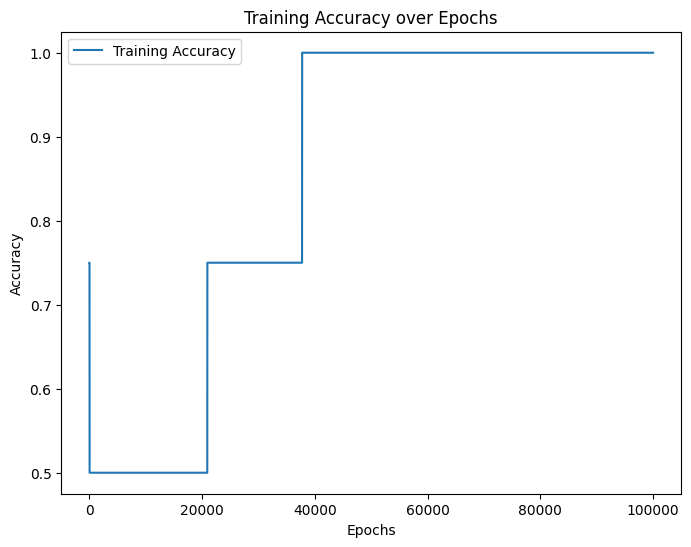

In [73]:

# Plot the accuracy graph
plot_accuracy(accuracies)

In [74]:
# Testing
X_test = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # XOR input
prediction = xornn.predict(X_test)

print("Input: ","[",X_test[0],X_test[1],"]")
print("Prediction: ",prediction)

Input:  [ [0 0 1 1] [0 1 0 1] ]
Prediction:  [[0. 1. 1. 0.]]
